In [29]:
def bin_packing_cost(solution, item_sizes, bin_size):
    bins = []
    for i in solution:
        for bin in bins:
            if sum(bin) + item_sizes[i] <= bin_size:
                bin.append(item_sizes[i])
                break
        else:
            bins.append([item_sizes[i]])
    return len(bins)

In [30]:
def harris_hawks_bin_packing(n_items, item_sizes, bin_size, num_of_hawks, max_iter):
    # Generar soluciones iniciales
    solutions = [generate_initial_solution(n_items) for _ in range(num_of_hawks)]
    
    # Lista para almacenar el número de bins en cada iteración
    num_bins_per_iteration = []
    
    for _ in range(max_iter):
        # Calcular costos de las soluciones actuales
        costs = [bin_packing_cost(sol, item_sizes, bin_size) for sol in solutions]
        
        # Encontrar la mejor solución hasta ahora
        best_solution = solutions[costs.index(min(costs))]
        
        # Almacenar el número de bins de la mejor solución en esta iteración
        num_bins_per_iteration.append(min(costs))
        
        for i in range(num_of_hawks):
            # Generar una nueva solución en la vecindad de la solución actual
            new_solution = move(solutions[i])
            
            # Si la nueva solución es mejor, la adoptamos
            if bin_packing_cost(new_solution, item_sizes, bin_size) < costs[i]:
                solutions[i] = new_solution

    # Devolver la mejor solución encontrada y la lista del número de bins en cada iteración
    costs = [bin_packing_cost(sol, item_sizes, bin_size) for sol in solutions]
    best_solution = solutions[costs.index(min(costs))]
    return best_solution, min(costs), num_bins_per_iteration

In [31]:
def generate_initial_solution(n_items):
    return random.sample(range(n_items), n_items)

def move(solution):
    new_solution = solution.copy()
    i, j = random.sample(range(len(solution)), 2)
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

In [32]:
# Parámetros conocidos
num_contenedores  = 150
peso = [42, 69, 67, 57, 93, 90, 38, 36, 45, 42, 33, 79, 27, 57, 44, 84, 86, 92, 46, 38, 85,33,82, 73, 49,
70, 59, 23, 57, 72, 74, 69, 33, 42, 28, 46, 30, 64, 29, 74, 41, 49, 55, 98, 80, 32, 25, 38,
82, 30, 35, 39, 57, 84, 62, 50, 55, 27, 30, 36, 20, 78, 47, 26, 45, 41, 58, 98, 91, 96, 73,
84, 37, 93, 91,43, 73, 85, 81, 79, 71, 80, 76, 83, 41, 78, 70, 23, 42, 87, 43, 84, 60, 55,
49, 78, 73, 62, 36, 44, 94, 69,32, 96, 70, 84, 58, 78, 25, 80, 58, 66, 83, 24, 98, 60, 42,
43, 43, 39, 97, 57, 81, 62, 75, 81, 23, 43, 50,38, 60, 58, 70, 88, 36, 90, 37, 45, 45, 39,
44, 53, 70, 24, 82, 81, 47, 97, 35, 65, 74, 68, 49, 55, 52, 94,95, 29, 99, 20, 22, 25, 49,
46, 98, 59, 98, 60, 23, 72, 33, 98, 80, 95, 78, 57, 67, 53, 47, 53, 36, 38, 92, 30, 80, 32,
97, 39, 80, 72, 55, 41, 60, 67, 53, 65, 95, 20, 66, 78, 98, 47, 100, 85, 53, 53, 67, 27, 22, 61,
43, 52, 76, 64, 61, 29, 30, 46, 79, 66, 27, 79, 98, 90, 22, 75, 57, 67, 36, 70, 99, 48, 43,
45, 71, 100, 88,48, 27, 39, 38, 100, 60, 42, 20, 69, 24, 23, 92, 32 ]
Capacidad_Contenedor = 150
Iteraciones = 200

In [35]:
import random

# Definir el tamaño de los ítems y el tamaño del contenedor
n_items = 150
item_sizes = peso.copy()
bin_size = 150

# Definir el número de "halcones" y el número máximo de iteraciones
num_of_hawks = 40
max_iter = 100

# Ejecutar el algoritmo de Harris Hawks para el problema de Bin Packing
# best_solution, best_cost = harris_hawks_bin_packing(n_items, item_sizes, bin_size, num_of_hawks, max_iter)

# print(f"La mejor solución encontrada es {best_solution}, que utiliza {best_cost} contenedores.")

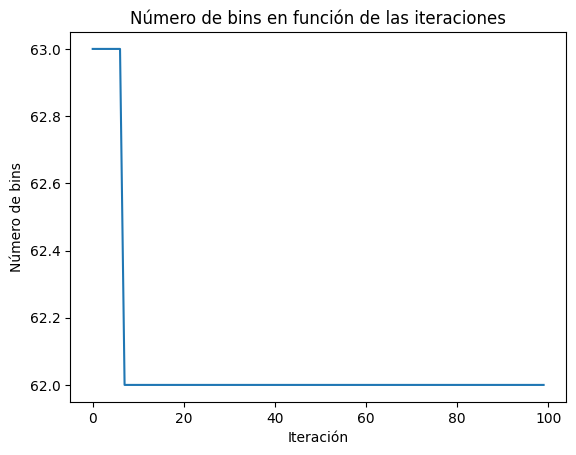

In [36]:
# Ejecutar el algoritmo de Harris Hawks para el problema de Bin Packing
best_solution, best_cost, num_bins_per_iteration = harris_hawks_bin_packing(n_items, item_sizes, bin_size, num_of_hawks, max_iter)

# Importar matplotlib para la visualización
import matplotlib.pyplot as plt

# Crear una figura y un eje
fig, ax = plt.subplots()

# Trazar el número de bins en función de las iteraciones
ax.plot(range(max_iter), num_bins_per_iteration)

# Establecer los títulos de la gráfica y los ejes
ax.set_title("Número de bins en función de las iteraciones")
ax.set_xlabel("Iteración")
ax.set_ylabel("Número de bins")

# Mostrar la gráfica
plt.show()